<a href="https://colab.research.google.com/github/AdamAnderB/Bramlett_DSPN_S24/blob/main/book/exercises/the-beauty-of-knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [2]:
# INSERT CODE HERE
library(class)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
data<-diamonds%>%
  mutate(mean_price=mean(price),
          price_bin=if_else(price>mean_price,1,0),
          price_bin=as.factor(price_bin))%>%
  select(carat, depth, table, x, y, price_bin)
head(data)
dim(data)
summary(data)

carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

     carat            depth           table             x         
 Min.   :0.2000   Min.   :43.00   Min.   :43.00   Min.   : 0.000  
 1st Qu.:0.4000   1st Qu.:61.00   1st Qu.:56.00   1st Qu.: 4.710  
 Median :0.7000   Median :61.80   Median :57.00   Median : 5.700  
 Mean   :0.7979   Mean   :61.75   Mean   :57.46   Mean   : 5.731  
 3rd Qu.:1.0400   3rd Qu.:62.50   3rd Qu.:59.00   3rd Qu.: 6.540  
 Max.   :5.0100   Max.   :79.00   Max.   :95.00   Max.   :10.740  
       y          price_bin
 Min.   : 0.000   0:34283  
 1st Qu.: 4.720   1:19657  
 Median : 5.710            
 Mean   : 5.735            
 3rd Qu.: 6.540            
 Max.   :58.900            

### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

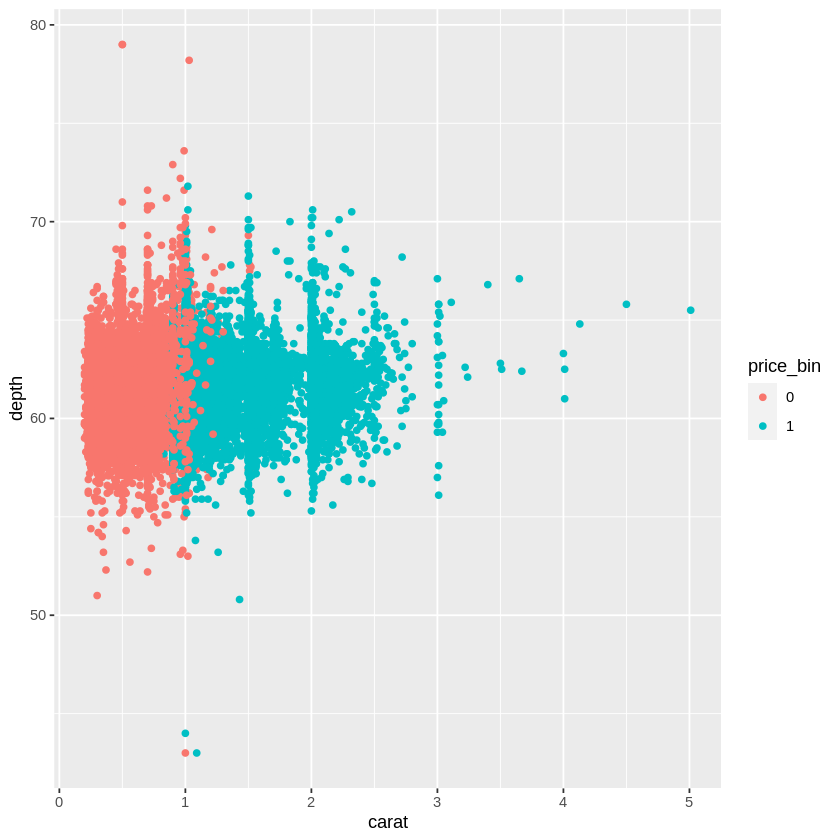

In [4]:
# INSERT CODE HERE
data%>%
  ggplot(aes(x=carat,y=depth,color=price_bin))+
  geom_point()

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> * *Write response here*
>I am not sure what exactly meant for the case of diabetis diagnosis. However, I am guess this is from a previous version of the homework. I will answer this based on how the current data set would do because I don't know anything about diabetis.
I think it should do pretty good since there is a clear seperation. I think this should actually be pretty easy for KNN
> *


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [5]:
set.seed(2023)
# INSERT CODE HERE
#set seperation
sample_size<- floor(0.7 * nrow(data))
#sample it out
train_indices<- sample(seq_len(nrow(data)), size=sample_size)

#data sets
train_data<- data[train_indices, ]
test_data<- data[-train_indices, ]


#double check
head(train_data)
head(test_data)
dim(train_data)
dim(test_data)

carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.22,62.3,56.0,6.81,6.84,1
1.57,62.3,56.0,7.48,7.41,1
1.11,62.4,57.7,6.57,6.64,1
0.42,60.6,57.0,4.82,4.85,0
0.32,62.6,55.0,4.39,4.36,0
0.90,62.7,58.0,6.06,6.15,1


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.26,61.9,55,4.07,4.11,0
0.22,65.1,61,3.87,3.78,0
0.23,62.8,56,3.93,3.90,0
0.31,62.2,54,4.35,4.37,0
0.20,60.2,62,3.79,3.75,0


[1] 37758     6

[1] 16182     6

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [6]:
train_target<- train_data$price_bin
test_target<- test_data$price_bin

set.seed(2023)
# INSERT CODE HERE
predicted_bins <- knn(train = train_data[, c("carat", "depth")],
                test = test_data[, c("carat", "depth")],
                cl = train_target,
                k = 3)

Now, output a confusion matrix and calculate the test error to evaluate model

1.   List item
2.   List item

performance.

In [7]:
# INSERT CODE HERE
conf_matrix<-table(Predicted = predicted_bins, Actual = test_target)

test_error <- 1-(sum(diag(conf_matrix))/sum(conf_matrix))

print(conf_matrix)
print(test_error)

         Actual
Predicted    0    1
        0 9756  302
        1  542 5582
[1] 0.05215672


How did your model perform?
> * Write your response here
>The error is only 5 % so I would say that is pretty good, but not great. It does a really decent job on getting low value diamonds as low value without overestimating. Similarly, it does a good job of categorizing high values ones without over categorizing. However, it has quite a few false positives and false negatives which could be improved in future modeling.
> *


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [8]:
set.seed(2023)
# INSERT CODE HERE
predicted_bins <- knn(train = train_data[, c("carat", "depth","table","x","y")],
                      test = test_data[, c("carat", "depth","table","x","y")],
                        cl = train_target,
                        k = 3)

conf_matrix<-table(Predicted = predicted_bins, Actual = test_target)
test_error <- 1-(sum(diag(conf_matrix))/sum(conf_matrix))

print(conf_matrix)
print(test_error)

         Actual
Predicted    0    1
        0 9782  367
        1  516 5517
[1] 0.0545668


Did your model predictions improve?
> * Write your response here
>This change barely changed the model at all. It went from 5% to .1% which is huge improvement. I think this lack of change is likely due to the fact that table,x, and y are all highly correlated with carat and depth. Meaning it provides little extra help in predicting
> *


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [ ]:
for (k in 1:30) {
  knn_fits <- knn(train = train_data[, c("carat", "depth")],
                  test = test_data[, c("carat", "depth")],
                  cl = train_target,
                  k = k)
  #overall error
  conf_df<-table(Predicted = knn_fits, Actual = test_target)
  output$error[k]<-1-(sum(diag(conf_df))/sum(conf_df))
}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05394883
2,2,0.05438141
3,3,0.05246570
4,4,0.05122976
5,5,0.05129156
6,6,0.05135336


In [ ]:
output

k,error
<int>,<dbl>
1,0.05394883
2,0.05438141
3,0.05246570
4,0.05122976
5,0.05129156
6,0.05135336
7,0.05085898
8,0.05061179
9,0.05048820


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


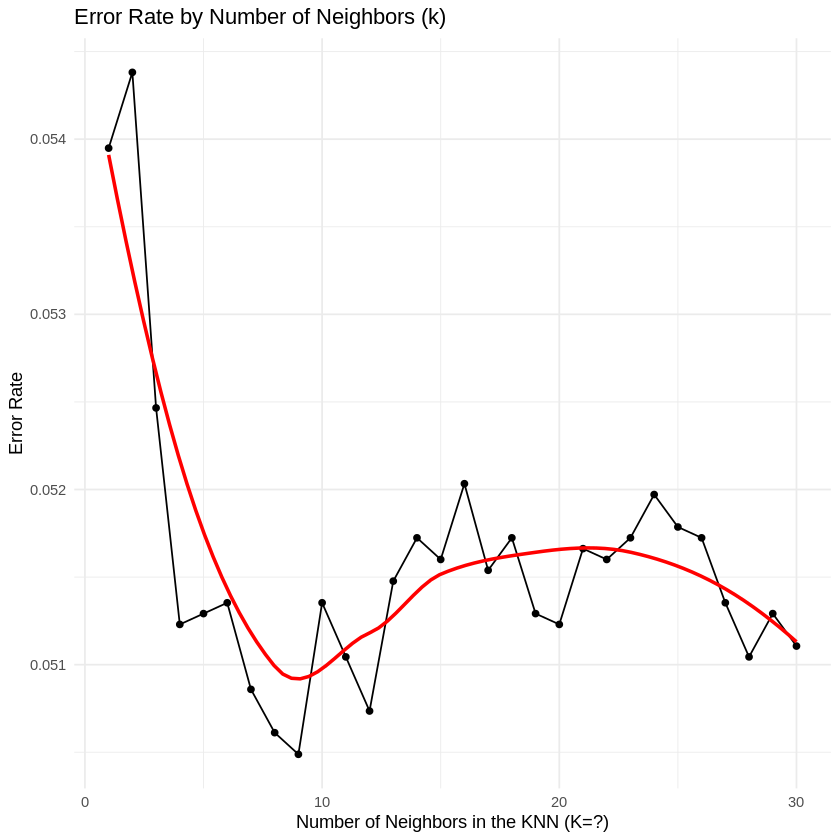

In [ ]:
# INSERT CODE HERE
output%>%
  ggplot(aes(x = k, y = error))+
  geom_point()+
  geom_line()+
  geom_smooth(method = "auto", se = FALSE,color="red")+
  labs(title = "Error Rate by Number of Neighbors (k)",
       x = "Number of Neighbors in the KNN (K=?)",
       y = "Error Rate") +
  theme_minimal()

Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> * *Write your response here*
>
> * I believe the best value of K is most likely to be k=8 because this is the loest value of error before it starts wavering beack and forth. THis takes more advantage of the bias variance trade off this way. It is the least bias to explain the most variance.


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
set.seed(2023)
#INSERT CODE HERE

train_data_standardized <- scale(train_data[, c("carat", "depth")])
test_data_standardized <- scale(test_data[, c("carat", "depth")])

predicted_bins <- knn(train = train_data_standardized[, c("carat", "depth")],
                  test = test_data_standardized[, c("carat", "depth")],
                  cl = train_target,
                  k = 8)

conf_matrix<-table(Predicted = predicted_bins, Actual = test_target)
test_error <- 1-(sum(diag(conf_matrix))/sum(conf_matrix))

print(conf_matrix)
print(test_error)


         Actual
Predicted    0    1
        0 9772  280
        1  526 5604
[1] 0.04980843


What impact did rescaling the data have on your error rate?
> * *Write response here*
> The error rate went down from the original model without scaling.
> *


**DUE:** 5pm March 20, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
